### Student Information
Name:吳祁澤

Student ID:109062311

GitHub ID:iamwu30204

Kaggle name:109062311

Kaggle private scoreboard snapshot: 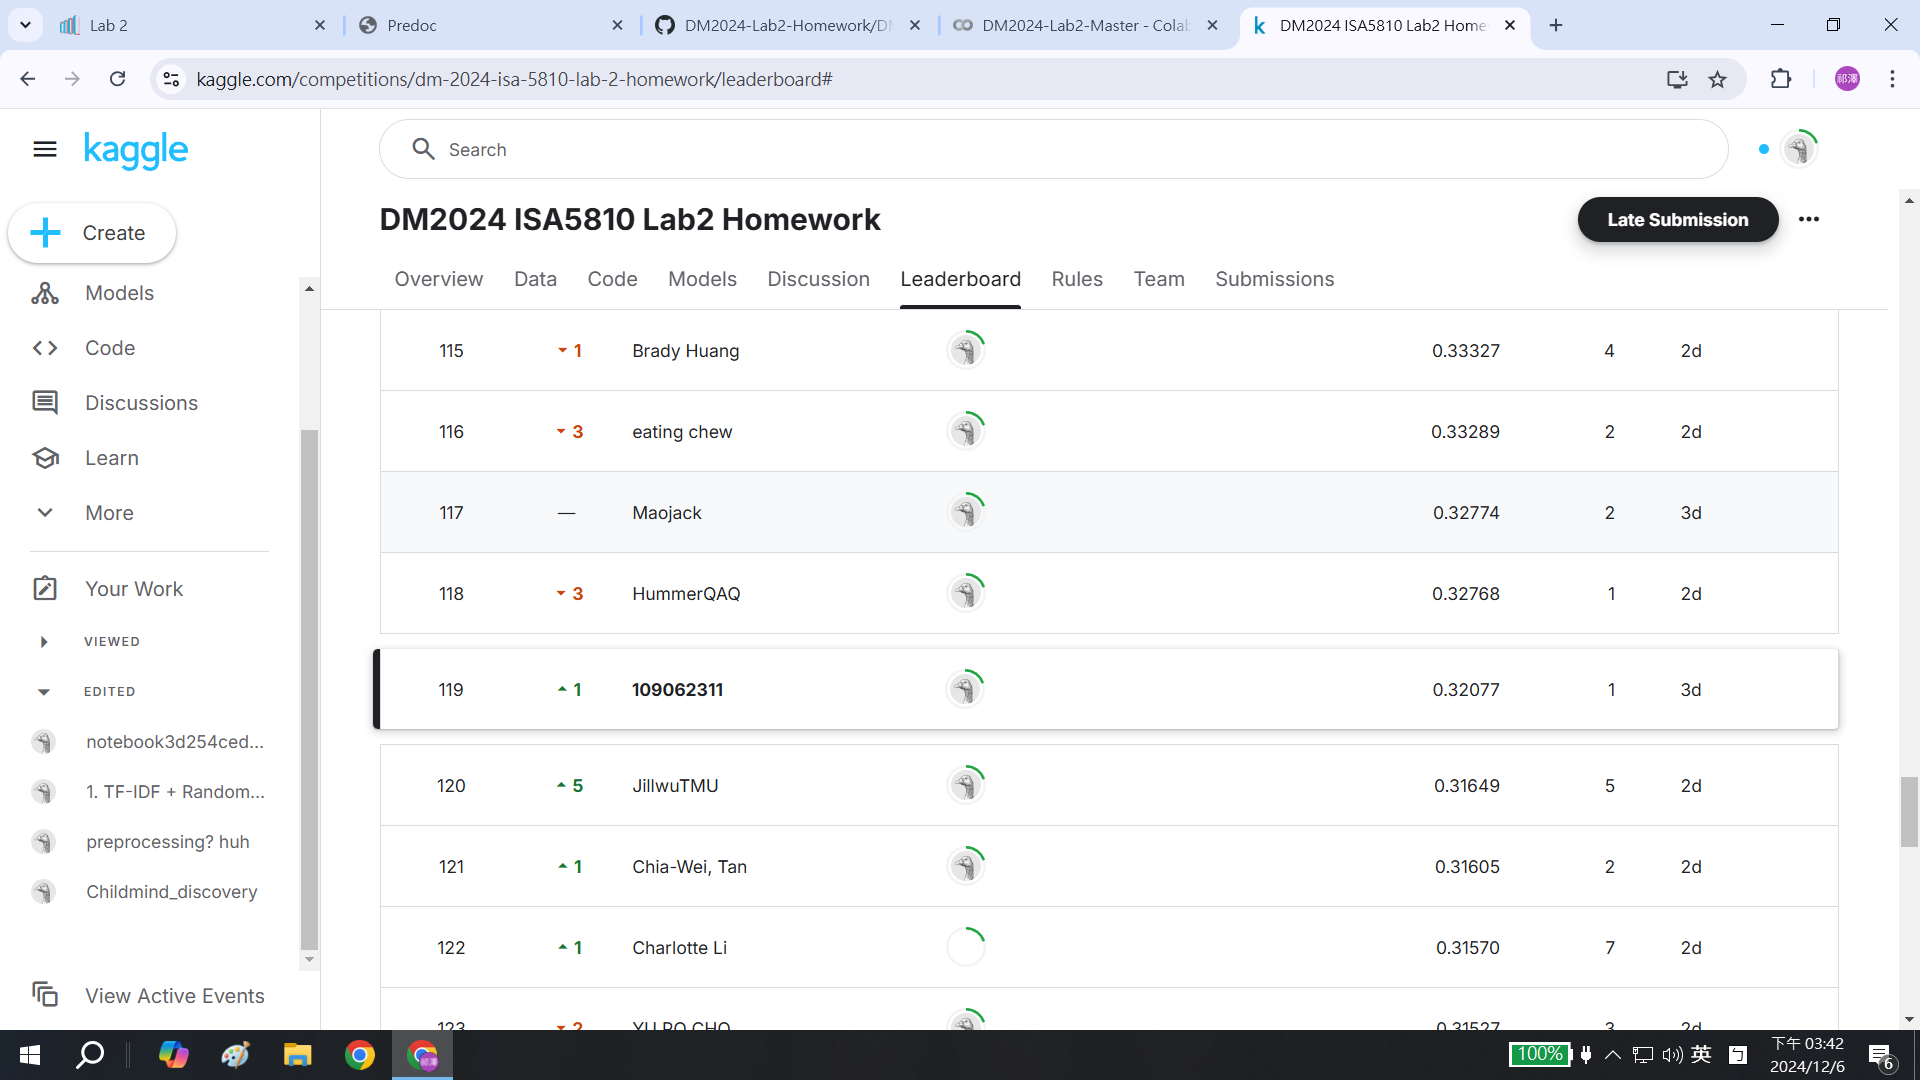

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here
import json
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Load data
data = []
with open('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))
 
f.close()
emotion = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv')
data_identification = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv')

In [3]:
# Get 'train' data
df = pd.DataFrame(data)
_source = df['_source'].apply(lambda x: x['tweet'])
df = pd.DataFrame({
    'tweet_id': _source.apply(lambda x: x['tweet_id']),
    'hashtags': _source.apply(lambda x: x['hashtags']),
    'text': _source.apply(lambda x: x['text']),
})
df = df.merge(data_identification, on='tweet_id', how='left')
train_data = df[df['identification'] == 'train']
test_data = df[df['identification'] == 'test']

train_data = train_data.merge(emotion, on='tweet_id', how='left') # Combine emotion 
train_data.drop_duplicates(subset=['text'], keep=False, inplace=True) # Remove duplication

In [4]:
# Split data
train_data_sample = train_data.sample(frac=0.2) # Get sample
train_data_sample

#X_train_data = X_train_data['text'] + ' ' + X_train_data['hashtags'].apply(lambda x: ' '.join(x)) # Combine text and hashtags 
y_train_data = train_data_sample['emotion']
X_train_data = train_data_sample['text']

X_train, X_test, y_train, y_test = train_test_split(
    X_train_data, y_train_data, test_size=0.25, random_state=42, stratify=y_train_data
)

In [5]:
# TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test)

In [6]:
# Encoding label
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [7]:
# Random forest
clf = RandomForestClassifier()
clf.fit(X, y_train)
model = clf

In [8]:
# Predict and evaluation
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.49734332519079755

In [9]:
test_data = df[df['identification'] == 'test'] # Get the test data from df
test_data

,tweet_id,hashtags,text,identification
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",test
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",test
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,test
30,0x2939d5,"[GodsPlan, GodsWork]","God woke you up, now chase the day #GodsPlan #...",test
33,0x26289a,[],"In these tough times, who do YOU turn to as yo...",test
...,...,...,...,...
1867525,0x2913b4,[],"""For this is the message that ye heard from th...",test
1867529,0x2a980e,[],"""There is a lad here, which hath five barley l...",test
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...,test
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...,test


In [10]:
X_test_data = test_data.drop(['tweet_id', 'identification'], axis=1)
X_test_data = X_test_data['text'] + ' ' + X_test_data['hashtags'].apply(lambda x: ' '.join(x))
X_test_data

2          Confident of your obedience, I write to you, k...
4          "Trust is not the same as faith. A friend is s...
9          When do you have enough ? When are you satisfi...
30         God woke you up, now chase the day #GodsPlan #...
33         In these tough times, who do YOU turn to as yo...
                                 ...                        
1867525    "For this is the message that ye heard from th...
1867529    "There is a lad here, which hath five barley l...
1867530    When you buy the last 2 tickets remaining for ...
1867531    I swear all this hard work gone pay off one da...
1867532    @Parcel2Go no card left when I wasn't in so I ...
Length: 411972, dtype: object

In [11]:
X_test_data = tfidf.transform(X_test_data).toarray()
y_test_pred = model.predict(X_test_data)
y_test_pred = le.inverse_transform(y_test_pred) # Inverse predict labels back to adjective words

In [12]:
submission = pd.DataFrame({
    'id': test_data['tweet_id'],
    'emotion': y_test_pred
})
submission.to_csv('/kaggle/working/submission.csv', index=False)